In [53]:
import networkx as nx
import pandas as pd

In [54]:
edges = [ # n1, n2, bidirection, required, weight
    (1, 2, True, False, 35),
    (1, 4, True, True, 70),
    (1, 5, False, True, 32),
    (2, 26, False, False, 21),
    (3, 2, False, True, 17),
    (3, 6, False, True, 30),
    (3, 7, True, True, 18),
    (3, 8, True, True, 41),
    (4, 5, True, True, 45),
    (4, 9, True, True, 23),
    (5, 11, False, False, 25),
    (6, 7, True, True, 25),
    (6, 28, True, False, 7),
    (7, 8, True, True, 9),
    (7, 13, True, True, 21),
    (7, 14, True, True, 11),
    (10, 11, False, True, 10),
    (10, 12, True, True, 30),
    (11, 12, True, True, 15),
    (11, 27, False, False, 7),
    (12, 16, True, False, 15),
    (12, 17, True, True, 13),
    (13, 29, True, False, 9),
    (14, 13, False, True, 15),
    (14, 15, False, True, 21),
    (14, 19, True, False, 8),
    (15, 20, True, False, 10),
    (16, 22, True, True, 40),
    (17, 23, True, False, 13),
    (18, 19, False, True, 25),
    (18, 24, True, False, 16),
    (19, 20, True, True, 16),
    (19, 24, True, True, 21),
    (19, 25, True, True, 25),
    (21, 22, True, True, 7),
    (23, 22, False, True, 27),
    (25, 24, False, True, 19),
    (25, 20, False, True, 12),
    (26, 27, True, False, 11),
    (27, 28, False, False, 5),
    (28, 13, False, False, 2),
    (29, 30, True, False, 3),
    (30, 18, False, False, 7),
    (30, 23, False, False, 18)    
]
edges_df = pd.DataFrame(edges)

In [55]:
edges_df.columns = ['n1', 'n2', 'bidirectional', 'required', 'weight']

In [56]:
V_r = set(edges_df.loc[edges_df['required'], ['n1', 'n2']].values.flatten())

In [58]:
G_all_arcs = nx.DiGraph()
G_all = nx.Graph()
G_not_req_arcs = nx.DiGraph()
G_not_req = nx.Graph()
G_req_arcs = nx.DiGraph()


def add_arc(graph, node1, node2, weight, required):
    if isinstance(graph, nx.DiGraph):
        graph.add_edge(node1, node2, weight=weight, bidirection=False, required=required)
    else:
        graph.add_edge(node1, node2, weight=weight, bidirection=False, required=required)
        del graph._adj[node2][node1]



for i, row in edges_df[(~edges_df['bidirectional'])  & ~(edges_df['required'])].iterrows():
    for graph in [G_all_arcs, G_all, G_not_req, G_not_req_arcs]:
        add_arc(graph, row['n1'], row['n2'], row['weight'], required=False)
    
for i, row in edges_df[(~edges_df['bidirectional']) & (edges_df['required'])].iterrows():
    for graph in [G_all_arcs, G_all, G_req, G_req_arcs]:
        add_arc(graph, row['n1'], row['n2'], row['weight'], required=True)

In [59]:

G_all_edges = nx.Graph()
G_req_edges = nx.Graph()
G_not_req_edges = nx.Graph()
G_req_edges = nx.Graph()

for i, row in edges_df[(edges_df['bidirectional']) & (edges_df['required'])].iterrows():
    for graph in [G_all_edges, G_req_edges, G_all, G_req]: 
        graph.add_edge(row['n1'], row['n2'], weight=row['weight'], bidirection=True, required=True)

for i, row in edges_df[(edges_df['bidirectional']) & ~(edges_df['required'])].iterrows():
    for graph in [G_all_edges, G_not_req_edges, G_all, G_not_req]: 
        graph.add_edge(row['n1'], row['n2'], weight=row['weight'], bidirection=True, required=False)

    
    
G_prime = G_req.copy()
for i, row in edges_df[edges_df['required']].iterrows():
    G_prime.add_edge(row['n1'], row['n2'], weight=row['weight'])


In [88]:
from itertools import permutations
from networkx.algorithms.shortest_paths import dijkstra_path, shortest_path_length
from collections import defaultdict
shortest_paths = defaultdict(dict)
dijkstra_paths = defaultdict(dict)
for i, j in (permutations(V_r, 2)):
    shortest_paths[i][j] = shortest_path_length(G_all, i, j, weight='weight')
    dijkstra_paths[i][j] = dijkstra_path(G_all, i, j, weight='weight')

In [71]:
shortest_paths[1][5]

32

In [72]:
shortest_paths[5][1]

115

In [76]:
def draw_graph(G):
    nx.draw_spring(G, with_labels=True, font_weight='bold')
    labels = nx.draw_networkx_labels(G, pos=nx.spring_layout(G))

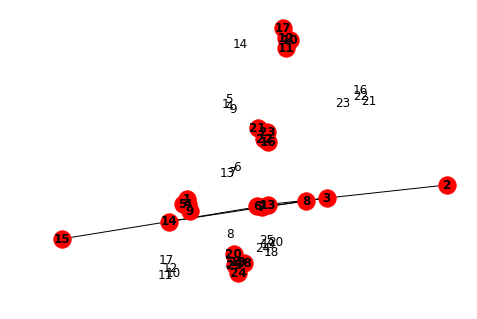

In [77]:
draw_graph(G_req)

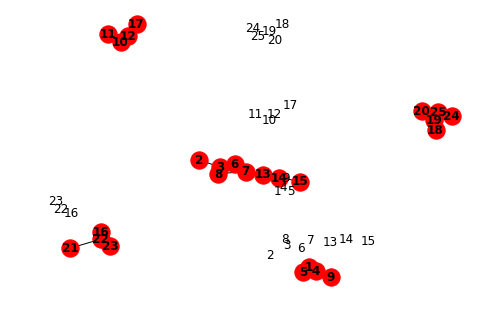

In [78]:
draw_graph(G_prime)

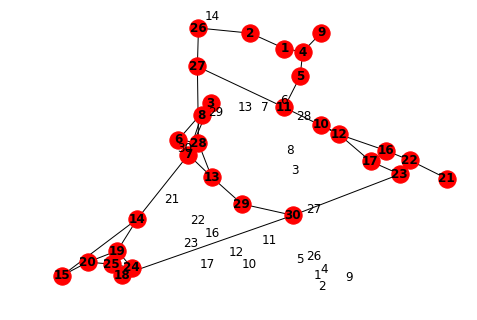

In [80]:
draw_graph(G_all)

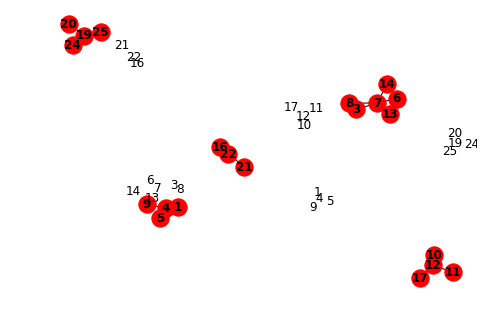

In [81]:
draw_graph(G_req_edges)

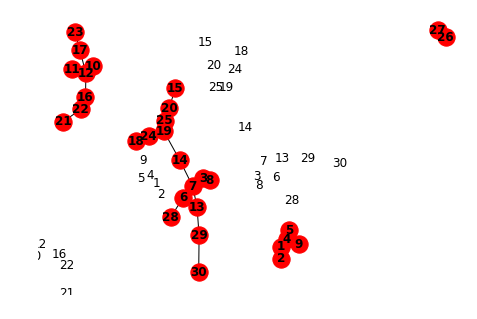

In [82]:
draw_graph(G_all_edges)

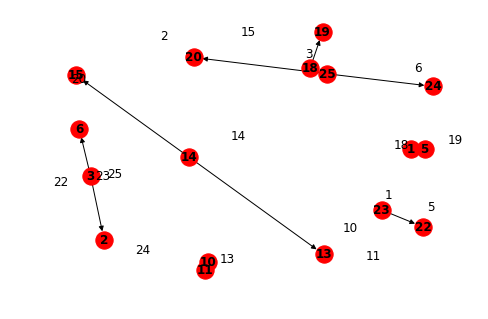

In [83]:
draw_graph(G_req_arcs)

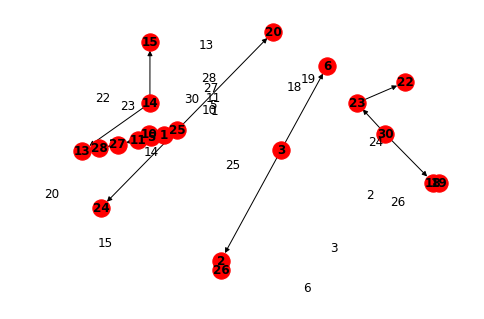

In [84]:
draw_graph(G_all_arcs)

In [86]:
list(G_all_edges.neighbors(1))

[4, 2]

In [87]:
list(G_all_arcs.neighbors(1))

[5]